In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Paths
train_dir = "train"
test_dir = "test"

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [4]:
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [5]:
# Flatten the data for ML models
train_data, train_labels = [], []
for images, labels in train_loader:
    train_data.append(images.view(images.size(0), -1).numpy())
    train_labels.append(labels.numpy())


In [6]:
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)

In [7]:
test_data, test_labels = [], []
for images, labels in test_loader:
    test_data.append(images.view(images.size(0), -1).numpy())
    test_labels.append(labels.numpy())

In [8]:
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

In [9]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# ============================
# Machine Learning Models
# ============================

In [10]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_data_scaled, train_labels)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [11]:
lr_preds = lr_model.predict(test_data_scaled)
lr_accuracy = accuracy_score(test_labels, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Accuracy: 0.95


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Get predictions from the Logistic Regression model
lr_preds = lr_model.predict(test_data_scaled)

# Accuracy
lr_accuracy = accuracy_score(test_labels, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Precision, Recall, F1-Score (weighted average to handle class imbalance)
lr_precision = precision_score(test_labels, lr_preds, average="weighted")
lr_recall = recall_score(test_labels, lr_preds, average="weighted")
lr_f1 = f1_score(test_labels, lr_preds, average="weighted")

# Print out detailed classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(test_labels, lr_preds))

# Confusion Matrix
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(test_labels, lr_preds))

# Summary of the metrics
print(f"\nLogistic Regression Precision: {lr_precision:.4f}")
print(f"Logistic Regression Recall: {lr_recall:.4f}")
print(f"Logistic Regression F1-Score: {lr_f1:.4f}")


Logistic Regression Accuracy: 0.95

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.91      0.95      0.93        21
           2       1.00      0.80      0.89         5
           3       0.95      0.91      0.93        23
           4       0.97      0.97      0.97        37

    accuracy                           0.95        94
   macro avg       0.95      0.93      0.93        94
weighted avg       0.95      0.95      0.95        94


Logistic Regression Confusion Matrix:
[[ 8  0  0  0  0]
 [ 1 20  0  0  0]
 [ 0  1  4  0  0]
 [ 0  1  0 21  1]
 [ 0  0  0  1 36]]

Logistic Regression Precision: 0.9485
Logistic Regression Recall: 0.9468
Logistic Regression F1-Score: 0.9465


# K-Nearest Neighbors


In [26]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_data_scaled, train_labels)


KNeighborsClassifier(n_neighbors=1)

In [101]:
import warnings

In [27]:
knn_preds = knn_model.predict(test_data_scaled)
knn_accuracy = accuracy_score(test_labels, knn_preds)
print(f"KNN Accuracy: {knn_accuracy:.2f}")


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

KNN Accuracy: 0.97


In [28]:
print(f"KNN Accuracy: {knn_accuracy:.2f}")


KNN Accuracy: 0.97


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Get predictions from the KNN model
knn_preds = knn_model.predict(test_data_scaled)

# Accuracy
knn_accuracy = accuracy_score(test_labels, knn_preds)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# Precision, Recall, F1-Score (weighted average to handle class imbalance)
knn_precision = precision_score(test_labels, knn_preds, average="weighted")
knn_recall = recall_score(test_labels, knn_preds, average="weighted")
knn_f1 = f1_score(test_labels, knn_preds, average="weighted")

# Print out detailed classification report
print("\nKNN Classification Report:")
print(classification_report(test_labels, knn_preds))

# Confusion Matrix
print("\nKNN Confusion Matrix:")
print(confusion_matrix(test_labels, knn_preds))

# Summary of the metrics
print(f"\nKNN Precision: {knn_precision:.4f}")
print(f"KNN Recall: {knn_recall:.4f}")
print(f"KNN F1-Score: {knn_f1:.4f}")


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

KNN Accuracy: 0.97

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.95      0.95      0.95        21
           2       0.83      1.00      0.91         5
           3       0.96      0.96      0.96        23
           4       1.00      0.97      0.99        37

    accuracy                           0.97        94
   macro avg       0.95      0.98      0.96        94
weighted avg       0.97      0.97      0.97        94


KNN Confusion Matrix:
[[ 8  0  0  0  0]
 [ 0 20  1  0  0]
 [ 0  0  5  0  0]
 [ 0  1  0 22  0]
 [ 0  0  0  1 36]]

KNN Precision: 0.9699
KNN Recall: 0.9681
KNN F1-Score: 0.9685


# Random Forest


In [15]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_data, train_labels)

RandomForestClassifier()

In [16]:
rf_preds = rf_model.predict(test_data)
rf_accuracy = accuracy_score(test_labels, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.95


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Get predictions from the Random Forest model
rf_preds = rf_model.predict(test_data)

# Accuracy
rf_accuracy = accuracy_score(test_labels, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Precision, Recall, F1-Score (weighted average to handle class imbalance)
rf_precision = precision_score(test_labels, rf_preds, average="weighted")
rf_recall = recall_score(test_labels, rf_preds, average="weighted")
rf_f1 = f1_score(test_labels, rf_preds, average="weighted")

# Print out detailed classification report
print("\nRandom Forest Classification Report:")
print(classification_report(test_labels, rf_preds))

# Confusion Matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(test_labels, rf_preds))

# Summary of the metrics
print(f"\nRandom Forest Precision: {rf_precision:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")


Random Forest Accuracy: 0.95

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.95      0.93        21
           2       1.00      0.80      0.89         5
           3       0.91      0.91      0.91        23
           4       0.97      0.97      0.97        37

    accuracy                           0.95        94
   macro avg       0.96      0.93      0.94        94
weighted avg       0.95      0.95      0.95        94


Random Forest Confusion Matrix:
[[ 8  0  0  0  0]
 [ 0 20  0  1  0]
 [ 0  1  4  0  0]
 [ 0  1  0 21  1]
 [ 0  0  0  1 36]]

Random Forest Precision: 0.9478
Random Forest Recall: 0.9468
Random Forest F1-Score: 0.9466


# Gaussian Naive Bayes


In [17]:
gnb_model = GaussianNB()
gnb_model.fit(train_data, train_labels)

GaussianNB()

In [18]:
gnb_preds = gnb_model.predict(test_data)
gnb_accuracy = accuracy_score(test_labels, gnb_preds)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy:.2f}")

Gaussian Naive Bayes Accuracy: 0.38


# ============================
# Deep Learning Models
# ============================

# ResNet50


In [60]:
resnet_model = models.resnet101(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, len(train_dataset.classes))
resnet_model = resnet_model.cuda()



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/zeus/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 196MB/s] 


In [69]:
vgg_model = models.vgg16(pretrained=True)
vgg_model.classifier[6] = nn.Linear(vgg_model.classifier[6].in_features, len(train_dataset.classes))
vgg_model = vgg_model.cuda()


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [70]:
criterion = nn.CrossEntropyLoss()
resnet_optimizer = optim.AdamW(resnet_model.parameters(), lr=0.001)
vgg_optimizer = optim.AdamW(vgg_model.parameters(), lr=3e-5)

In [71]:
import torch
import matplotlib.pyplot as plt

# Train Deep Learning Models with Tracking for Loss and Accuracy
def train_model(model, optimizer, num_epochs=50):
    model.train()
    
    # Lists to store loss and accuracy values for each epoch
    epoch_loss = []
    epoch_accuracy = []
    
    for epoch in range(num_epochs):
        running_loss, correct, total = 0.0, 0, 0
        
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate loss and accuracy for the epoch
        epoch_loss.append(running_loss / len(train_loader))
        accuracy = 100 * correct / total
        epoch_accuracy.append(accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return model, epoch_loss, epoch_accuracy




In [73]:

# Train ResNet50
print("Training ResNet50...")
resnet_model ,losses,accuracies= train_model(resnet_model, resnet_optimizer,num_epochs=40)

Training ResNet50...


Epoch [1/40], Loss: 24.4913, Accuracy: 53.63%
Epoch [2/40], Loss: 22.9522, Accuracy: 54.50%
Epoch [3/40], Loss: 24.6960, Accuracy: 51.90%
Epoch [4/40], Loss: 22.9904, Accuracy: 52.94%
Epoch [5/40], Loss: 21.5203, Accuracy: 52.25%
Epoch [6/40], Loss: 20.4584, Accuracy: 57.44%
Epoch [7/40], Loss: 21.4897, Accuracy: 56.92%
Epoch [8/40], Loss: 19.9589, Accuracy: 57.96%
Epoch [9/40], Loss: 22.4699, Accuracy: 51.56%
Epoch [10/40], Loss: 20.9112, Accuracy: 55.36%
Epoch [11/40], Loss: 20.4089, Accuracy: 57.96%
Epoch [12/40], Loss: 20.5196, Accuracy: 56.06%
Epoch [13/40], Loss: 19.5264, Accuracy: 57.44%
Epoch [14/40], Loss: 19.8002, Accuracy: 58.82%
Epoch [15/40], Loss: 20.7459, Accuracy: 59.52%
Epoch [16/40], Loss: 19.1097, Accuracy: 63.32%
Epoch [17/40], Loss: 17.8839, Accuracy: 67.82%
Epoch [18/40], Loss: 15.4173, Accuracy: 69.55%
Epoch [19/40], Loss: 13.9791, Accuracy: 70.42%
Epoch [20/40], Loss: 16.5656, Accuracy: 73.36%
Epoch [21/40], Loss: 19.8851, Accuracy: 59.86%
Epoch [22/40], Loss: 1

In [75]:
resnet_model ,losses,accuracies=resnet_model

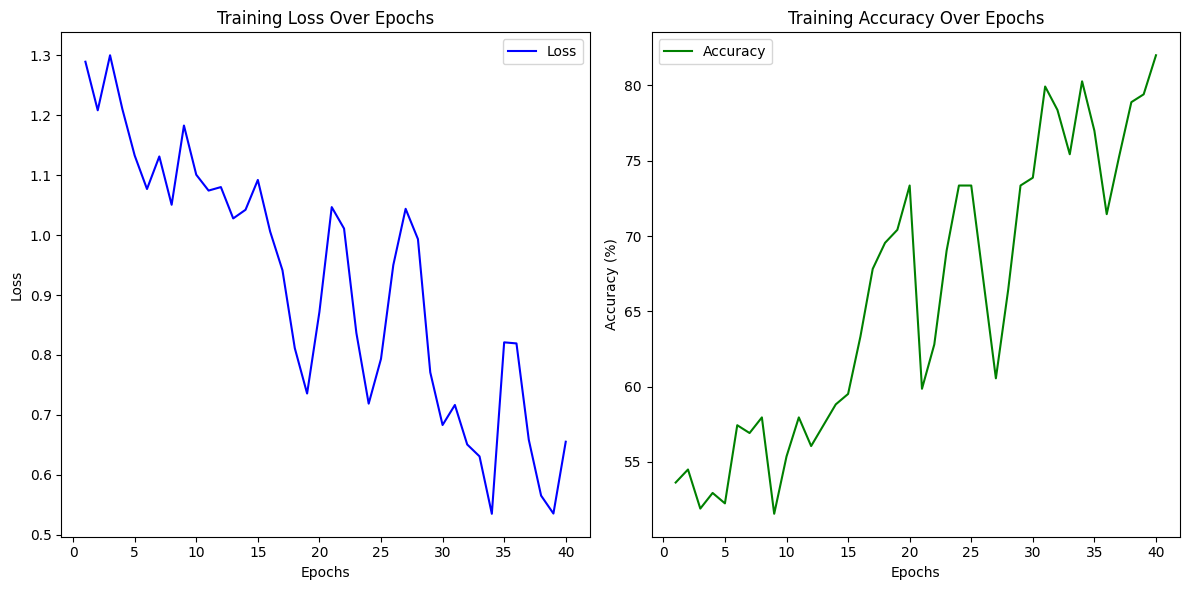

In [76]:
plot_metrics(losses, accuracies)



In [78]:
resnet_model ,losses,accuracies= train_model(resnet_model, resnet_optimizer,num_epochs=20)

Epoch [1/20], Loss: 10.4539, Accuracy: 79.76%
Epoch [2/20], Loss: 8.2422, Accuracy: 84.95%
Epoch [3/20], Loss: 7.1810, Accuracy: 87.02%
Epoch [4/20], Loss: 6.4909, Accuracy: 87.02%
Epoch [5/20], Loss: 6.7538, Accuracy: 86.51%
Epoch [6/20], Loss: 8.9029, Accuracy: 88.24%
Epoch [7/20], Loss: 10.9770, Accuracy: 81.31%
Epoch [8/20], Loss: 11.6155, Accuracy: 85.64%
Epoch [9/20], Loss: 9.7090, Accuracy: 85.81%
Epoch [10/20], Loss: 8.7342, Accuracy: 84.78%
Epoch [11/20], Loss: 7.7505, Accuracy: 85.47%
Epoch [12/20], Loss: 6.8494, Accuracy: 89.27%
Epoch [13/20], Loss: 9.0624, Accuracy: 92.21%
Epoch [14/20], Loss: 10.9067, Accuracy: 80.28%
Epoch [15/20], Loss: 11.2926, Accuracy: 77.34%
Epoch [16/20], Loss: 9.4533, Accuracy: 82.18%
Epoch [17/20], Loss: 7.2937, Accuracy: 89.62%
Epoch [18/20], Loss: 6.7281, Accuracy: 87.54%
Epoch [19/20], Loss: 4.9595, Accuracy: 90.31%
Epoch [20/20], Loss: 8.0435, Accuracy: 93.94%


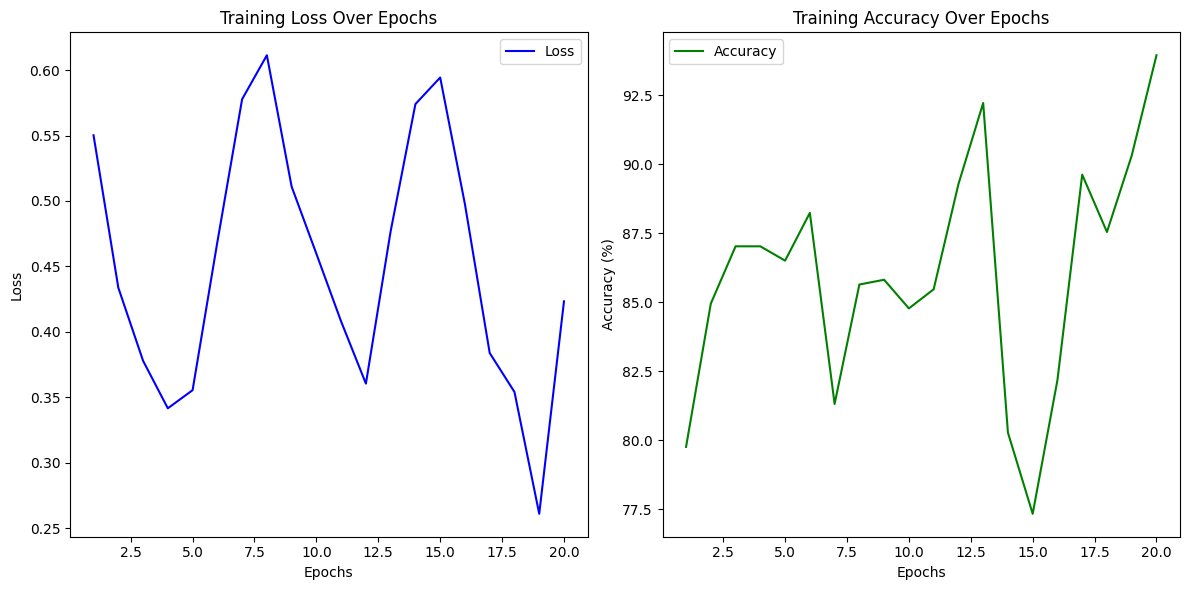

In [79]:
plot_metrics(losses, accuracies)


In [83]:
resnet_model ,losses,accuracies= train_model(resnet_model, resnet_optimizer,num_epochs=5)

Epoch [1/5], Loss: 10.7197, Accuracy: 83.56%
Epoch [2/5], Loss: 6.9941, Accuracy: 87.37%
Epoch [3/5], Loss: 4.7563, Accuracy: 92.56%
Epoch [4/5], Loss: 3.1773, Accuracy: 96.19%
Epoch [5/5], Loss: 2.3006, Accuracy: 96.89%


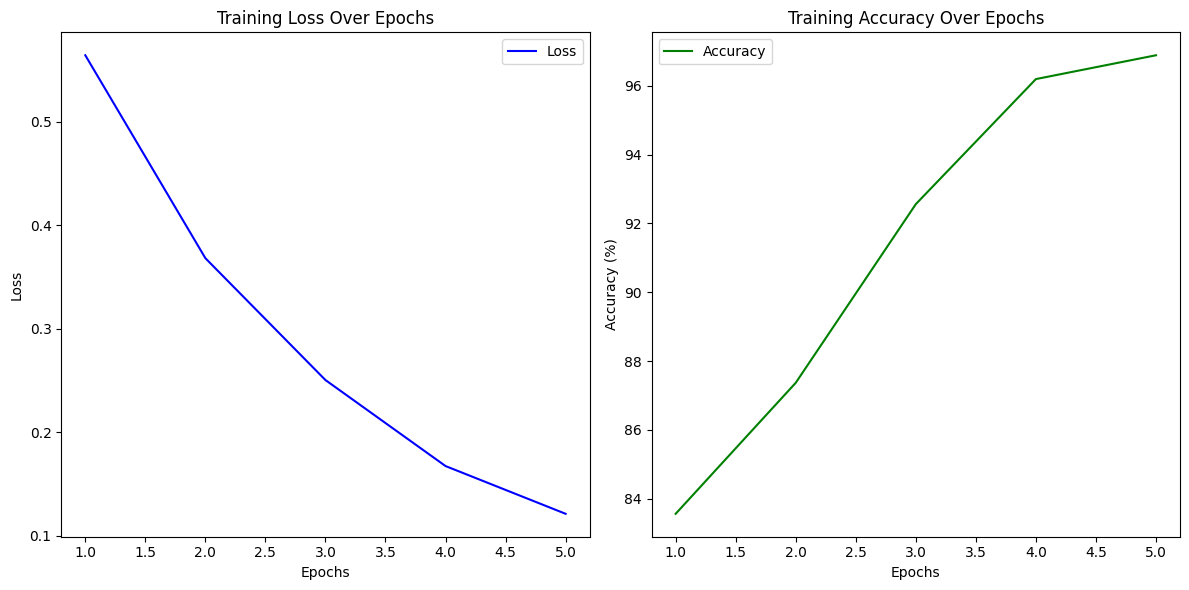

In [84]:
plot_metrics(losses,accuracies)

In [85]:
# Train VGG16
print("Training VGG16...")
vgg_model = train_model(vgg_model, vgg_optimizer,num_epochs=16)

Training VGG16...


Epoch [1/16], Loss: 24.8816, Accuracy: 43.60%
Epoch [2/16], Loss: 19.8753, Accuracy: 58.82%
Epoch [3/16], Loss: 16.2305, Accuracy: 69.03%
Epoch [4/16], Loss: 11.3155, Accuracy: 77.68%
Epoch [5/16], Loss: 9.9959, Accuracy: 84.08%
Epoch [6/16], Loss: 6.1780, Accuracy: 88.41%
Epoch [7/16], Loss: 4.7992, Accuracy: 90.83%
Epoch [8/16], Loss: 3.3024, Accuracy: 93.25%
Epoch [9/16], Loss: 1.8715, Accuracy: 96.71%
Epoch [10/16], Loss: 1.0412, Accuracy: 98.96%
Epoch [11/16], Loss: 1.5275, Accuracy: 97.58%
Epoch [12/16], Loss: 1.2619, Accuracy: 98.27%
Epoch [13/16], Loss: 0.9940, Accuracy: 98.10%
Epoch [14/16], Loss: 0.5160, Accuracy: 99.13%
Epoch [15/16], Loss: 0.3042, Accuracy: 99.48%
Epoch [16/16], Loss: 0.0869, Accuracy: 100.00%


In [86]:
vgg_model,losses,accuracies=vgg_model

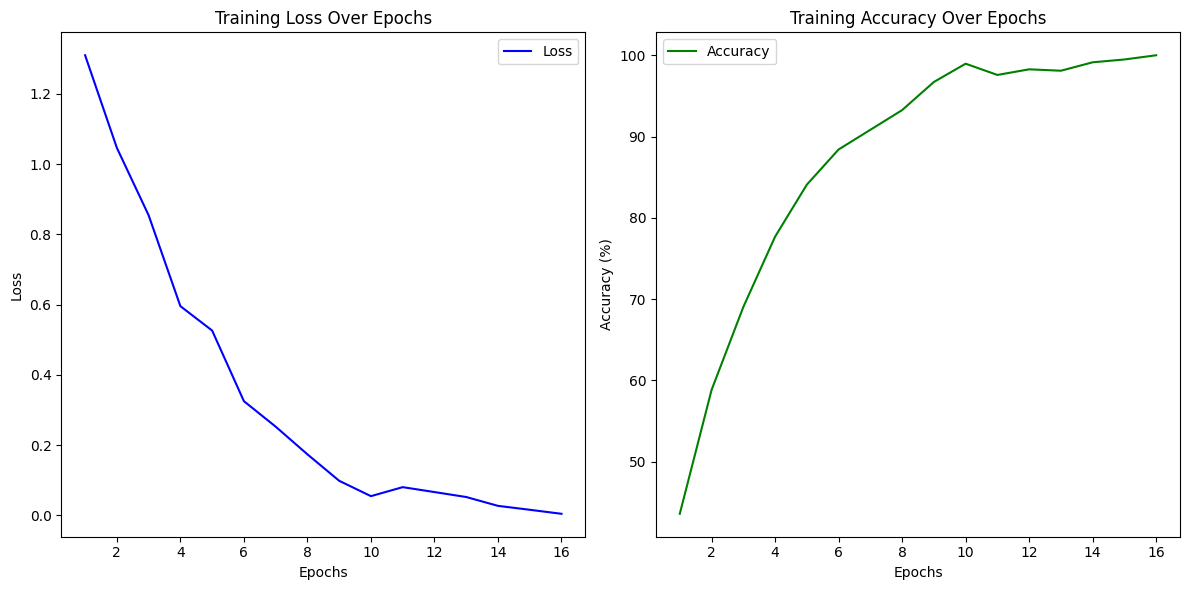

In [87]:
# Plot Training Loss and Accuracy
def plot_metrics(losses, accuracies):
    epochs = range(1, len(losses) + 1)

    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, losses, label='Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracies, label='Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_metrics(losses, accuracies)


In [88]:

# Evaluate Deep Learning Models
def evaluate_model(model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [89]:
# Evaluate ResNet50
resnet_accuracy = evaluate_model(resnet_model)
print(f"ResNet50 Accuracy: {resnet_accuracy:.2f}%")


ResNet50 Accuracy: 95.74%


In [90]:
# Evaluate VGG16
vgg_accuracy = evaluate_model(vgg_model)
print(f"VGG16 Accuracy: {vgg_accuracy:.2f}%")

VGG16 Accuracy: 98.94%



# ============================
# Save Machine Learning Models
# ============================


In [91]:
import torch
import joblib
import os

# Directory to save models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save Logistic Regression
lr_model_path = os.path.join(save_dir, "logistic_regression_model.pkl")
joblib.dump(lr_model, lr_model_path)
print(f"Logistic Regression model saved to {lr_model_path}")

# Save KNN
knn_model_path = os.path.join(save_dir, "knn_model.pkl")
joblib.dump(knn_model, knn_model_path)
print(f"KNN model saved to {knn_model_path}")

# Save Random Forest
rf_model_path = os.path.join(save_dir, "random_forest_model.pkl")
joblib.dump(rf_model, rf_model_path)
print(f"Random Forest model saved to {rf_model_path}")

# Save Gaussian Naive Bayes
gnb_model_path = os.path.join(save_dir, "gaussian_nb_model.pkl")
joblib.dump(gnb_model, gnb_model_path)
print(f"Gaussian Naive Bayes model saved to {gnb_model_path}")





Logistic Regression model saved to saved_models/logistic_regression_model.pkl
KNN model saved to saved_models/knn_model.pkl
Random Forest model saved to saved_models/random_forest_model.pkl
Gaussian Naive Bayes model saved to saved_models/gaussian_nb_model.pkl
ResNet50 model saved to saved_models/resnet50_model.pth
VGG16 model saved to saved_models/vgg16_model.pth


# ============================
# Save Deep Learning Models
# ============================


In [104]:
# Save ResNet50
resnet_model_path = os.path.join(save_dir, "resnet50_model.pth")
torch.save(resnet_model.state_dict(), resnet_model_path)
print(f"ResNet50 model saved to {resnet_model_path}")

# Save VGG16
vgg_model_path = os.path.join(save_dir, "vgg16_model.pth")
torch.save(vgg_model.state_dict(), vgg_model_path)
print(f"VGG16 model saved to {vgg_model_path}")

ResNet50 model saved to saved_models/resnet50_model.pth
VGG16 model saved to saved_models/vgg16_model.pth
